In [1]:
# import libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# display matplotlib graph's within notebook
%matplotlib inline 
import scipy.linalg
import numpy as np
import os

np.set_printoptions(precision=3,suppress=True)

In [2]:
# Aufgabe 1
# Daten
points_size = 100
num_iters = 400
alpha = 0.01
J_history = np.zeros((num_iters, 1))

x_1 = np.random.uniform(0, 50, points_size)
x_2 = np.random.uniform(0, 50, points_size)
X = np.column_stack((x_1, x_2))
m = len(X)
X_norm = np.append(np.ones((m,1)), X, axis=1)
print("X_norm till 10: ", X_norm[:10])


X_norm till 10:  [[ 1.    43.428 26.776]
 [ 1.     8.026 36.177]
 [ 1.    38.861 32.817]
 [ 1.    31.961 21.101]
 [ 1.    25.973  4.828]
 [ 1.     1.787  4.623]
 [ 1.    29.771 17.181]
 [ 1.    27.887 31.526]
 [ 1.    47.318 41.81 ]
 [ 1.    47.011 42.759]]


In [3]:
# Aufgabe 2
def linear_hypothesis(theta):
    def h(X):
        y = np.ndarray.flatten(np.dot(X_norm, np.transpose(theta)))
        return y
    return h

In [4]:
# Aufgabe 3
# a) Y
theta = np.array([1.1, 2.0, 9]) 
h = linear_hypothesis(theta)
y_pure = h(X_norm)
Y = y_pure + np.random.uniform(0, 10, points_size)
#Y = np.matrix(Y)
print("Y till 10: ", Y[:10])

Y till 10:  [337.658 347.348 378.589 260.039 106.027  50.701 225.101 348.259 474.795
 485.187]


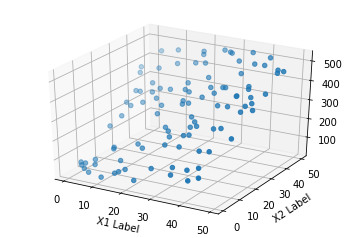

In [5]:
# b) Plotten ohne Scaling
fig = plt.figure("b")
ax = fig.gca(projection='3d')
ax.scatter(xs = X_norm[:,1], ys = X_norm[:,2], zs = Y)
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
plt.show()

In [6]:
# c) Feature scaling
# create array's of zeros for mean and standart deviation
X_norm = X
mu = np.zeros((1,np.size(X[:1])))
sigma = np.zeros((1,np.size(X[:1])))
# Normalize X data
for i in range(np.size(mu)):
    # Identify mean value for each dimension/column
    mu[:,i] = np.mean(X[:,i])
    # Identify standard deviation value for each dimension/column
    sigma[:,i] = np.std(X[:,i])
    # Set X_norm equal to the X normalized value ((value-meanValue)/standardDeviation)
    X_norm[:,i] = (X[:,i]-mu[:,i])/sigma[:,i]

In [7]:
# Print mit Scaling
X_norm = np.append(np.ones((m,1)), X_norm, axis=1)
print("X_norm till 10: ", X_norm[:10])

X_norm till 10:  [[ 1.     1.35   0.047]
 [ 1.    -1.168  0.686]
 [ 1.     1.026  0.458]
 [ 1.     0.535 -0.339]
 [ 1.     0.109 -1.445]
 [ 1.    -1.612 -1.459]
 [ 1.     0.379 -0.605]
 [ 1.     0.245  0.37 ]
 [ 1.     1.627  1.069]
 [ 1.     1.605  1.134]]


In [8]:
# Aufgabe 4
def cost_function(X_norm, y):
    def j(theta):
        J_cost = 0
        for j in range(m):
            J_cost = J_cost + ((1/(2*m))*np.square(np.dot(np.transpose(theta),np.transpose(X_norm[j,:]))-y[j]))
        return J_cost
    return j

In [9]:
# Aufgabe 5
# a)
def compute_new_theta (X_norm, Y, theta, alpha):
    #theta_temp = theta - np.dot(np.transpose(X_norm),np.ndarray.flatten(np.dot(X_norm,theta)) - Y)*(alpha/m)
    h = linear_hypothesis(theta)
    theta_temp = theta - np.dot(np.transpose(X_norm), h(X_norm) - Y)*(alpha/m)
    return theta_temp

In [10]:
# b), c)
def gradient_descent(alpha, theta, X_norm, Y):
    for i in range(num_iters):
        theta = compute_new_theta(X_norm, Y, theta, alpha)
        for j in range(m):
            j = cost_function(X_norm, Y)
            J_cost = j(theta)
            J_history[i] = J_cost
    return J_history, theta

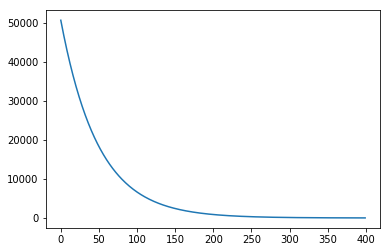

In [11]:
# Kosten plotten
theta_test = np.array([0, 0, 0]) 
J_history, theta_result = gradient_descent(alpha, theta_test, X_norm, Y)
plt.plot(J_history)

In [12]:
# test Before/After
print("Y_before till 10: ", Y[:10])
h = linear_hypothesis(theta_result)
Y = h(X_norm)
print("Y_after till 10: ", Y[:10])

Y_before till 10:  [337.658 347.348 378.589 260.039 106.027  50.701 225.101 348.259 474.795
 485.187]
Y_after till 10:  [330.426 339.465 374.238 256.344 100.119  47.76  217.15  339.895 471.331
 479.069]


(-1.8840703871889546,
 1.9385443719166104,
 -1.8835989280523517,
 1.7720003433349623)

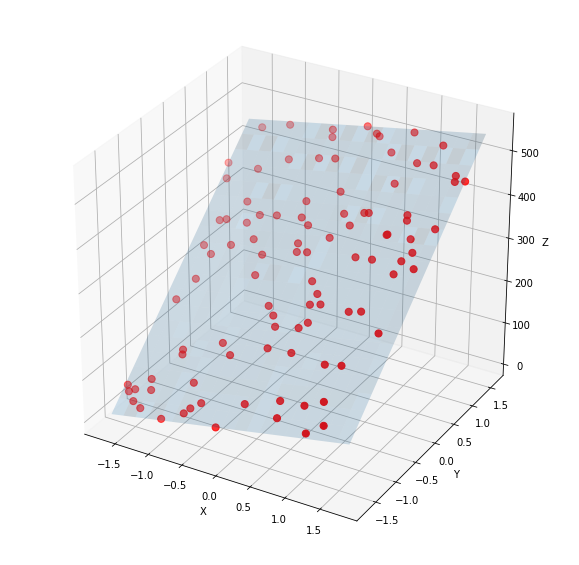

In [13]:
# Aufgabe 6

data = np.c_[X_norm[:, 1], X_norm[:, 2], Y]

# regular grid covering the domain of the data
mn = np.min(data, axis=0)
mx = np.max(data, axis=0)
X,Y = np.meshgrid(np.linspace(mn[0], mx[0], 20), np.linspace(mn[1], mx[1], 20))
XX = X.flatten()
YY = Y.flatten()
    
# best-fit linear plane (1st-order)
A = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])    # coefficients
    
# evaluate it on grid
Z = C[0]*X + C[1]*Y + C[2]

fig1 =  plt.figure(figsize=(10, 10))
ax = fig1.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.axis('tight')
